# Predicting Wine Quality
**Author: Vincent Lau**
# **Overview**
The overall goal of this industry is to create the best wine that is effectively can be manufactured and produce AND most of all, being able to make the best quality.

The goal of this assignment is to build a classification model that will be able to analyze the wine quality in acholoholic drinks to determine what kind of ingrediants, texture and levels makes the drink the best. Being able to design a model that can accurately predict what kind of ingredients that would make the wine quality better would help companies to target and focus their attention on that ingredient to make productiveity and quality better for business. 

# **Data**
The Wine Quality for this project was obtained from a website. The dataset has information about many wine tests. The features represent the mean values for fixed acidity, volatile acidity, citric acid, residual sugar	chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol quality.

Link to Dataset: https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434

# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Uploading the DataSet

In [2]:
df = pd.read_csv("winequality-red.csv")#this is the dataset from the wine website I used for is quality

In [3]:
df.head()#this indicates the dataset for the first 5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* the data shows 11 features and target variable that represents type of ingredient

In [6]:
df['quality']=df['quality'].map(str)#this was to change the type from integer into string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


# Exploring Dataset

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: object

# Creating matix style information

In [9]:
df['quality'] = df['quality'].apply(lambda x: '3-4' if ('3' in x or '4' in x) else x)
df['quality'] = df['quality'].apply(lambda x: '5-6' if ('5' in x or '6' in x) else x)
df['quality'] = df['quality'].apply(lambda x: '7-8' if ('7' in x or '8' in x) else x)
df['quality'].value_counts()#this forces all the categories of number qualities like 3 and 4 into one category 3-4 and counts

5-6    1319
7-8     217
3-4      63
Name: quality, dtype: int64

In [10]:
x = df.drop("quality", axis=1)
y = df["quality"]
x_train,x_test,y_train , y_test = train_test_split (x , y )#this is properly splits the data

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)#I concooperated this so that the program would not misread predicting and reading

# Baseline Model Algorithm - Logistic Regression

The first model I will build is Logistic Regression with default parameters. Logistic Regression is a linear model for classification. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [12]:
model1 = LogisticRegression(multi_class='auto').fit(x_train, y_train)# this uses the algorithm LogReg

### Make Predictions for Train and Test Sets

In [13]:
y_hat_test=model1.predict(x_test)
y_hat_train= model1.predict(x_train)#this sets up the variable for prediciting outcomes

### Residuals: Checking for correct Values based on Logistic Regression

In [14]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts()) # this counts how many predicted were true and false using LogReg.

residuals = y_test == y_hat_test
print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using LogReg.

Number of values correctly predicted:
True     1004
False     195
Name: quality, dtype: int64
Number of values correctly predicted: 
True     343
False     57
Name: quality, dtype: int64


### Accuracy Scores for Train and Test Sets

In [15]:
print(accuracy_score(y_train, y_hat_train))#this calculated accuracy of the algorithm
print(accuracy_score(y_test, y_hat_test))#this calculated accuracy of the algorithm

0.8373644703919934
0.8575


### Confusion Matrix

<Figure size 720x720 with 0 Axes>

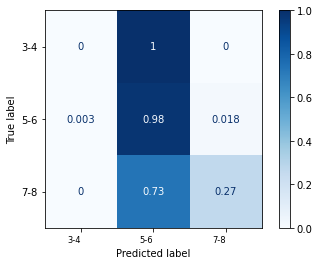

In [16]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model1, x_test, y_test,cmap=plt.cm.Blues,normalize='true')
plt.xticks(horizontalalignment='right', fontsize='small')
plt.show() #this writes the matrix of the accuracy

# Model Results:
* Accuracy Score is fairly high 
* It has a lot of overfitting based on the matrix. Since in between 5-6, it showed how it is predicting 3-4 as 5-6.
* Confusion Matrix shows that model predicts about 84% of target value correctly for both of the categories.
* Resudials show that only 65 values were predicted incorrectly out of 335.

# Baseline Model Algorithm - Decision Tree Classifier

Decision Tree Classifier is non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [17]:
model2 = DecisionTreeClassifier().fit(x_train, y_train)# this uses the algorithm DecisionTree

### Make Predictions for Train and Test Sets

In [18]:
y_hat_test=model2.predict(x_test)
y_hat_train= model2.predict(x_train)#this sets up the variable for prediciting outcomes

### Residuals: Checking for correct Values based on Decision Tree Classifier

In [19]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using DecisionTree.

residuals = y_test == y_hat_test
print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using DecisionTree.

Number of values correctly predicted:
True    1199
Name: quality, dtype: int64
Number of values correctly predicted: 
True     333
False     67
Name: quality, dtype: int64


### Accuracy Scores for Train and Test Sets

In [20]:
print(accuracy_score(y_train, y_hat_train))#this calculated accuracy of the algorithm
print(accuracy_score(y_test, y_hat_test))#this calculated accuracy of the algorithm

1.0
0.8325


### Confusion Matrix

<Figure size 720x720 with 0 Axes>

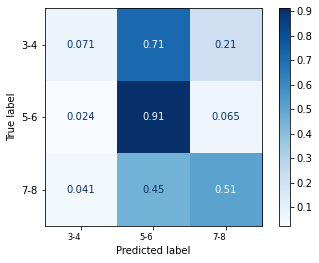

In [21]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model2, x_test, y_test, cmap=plt.cm.Blues,normalize='true')
plt.xticks(horizontalalignment='right', fontsize='small')
plt.show()#this writes the matrix of the accuracy

# Model Results:
* There were half tha seemed to be undergoing overfitting in thie chart
* Confusion Matrix shows that model predicts .
* Resudials show that 64 values were predicted incorrectly out of 336.
* Overall model showed horrible performance, but better than Logistic Regression

# Baseline Model Algorithm - K Neighbors Classifier

This model, contains the principle behind which is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant, or vary based on the local density of points.

In [22]:
model3 = KNeighborsClassifier().fit(x_train, y_train)

### Make Predictions for Train and Test Sets

In [23]:
y_hat_test=model3.predict(x_test)
y_hat_train= model3.predict(x_train)#this sets up the variable for prediciting outcomes

### Residuals: Checking for correct Values based on K Neighbors Classifier

In [24]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using Kneighbor

residuals = y_test == y_hat_test
print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())# this counts how many predicted were true and false using Kneighbor.

Number of values correctly predicted:
True     1043
False     156
Name: quality, dtype: int64
Number of values correctly predicted: 
True     328
False     72
Name: quality, dtype: int64


### Accuracy Scores for Train and Test Sets

In [25]:
print(accuracy_score(y_train, y_hat_train))#this calculated accuracy of the algorithm
print(accuracy_score(y_test, y_hat_test))#this calculated accuracy of the algorithm

0.8698915763135947
0.82


### Confusion Matrix

<Figure size 720x720 with 0 Axes>

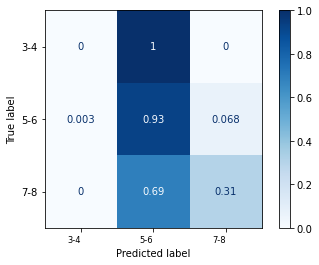

In [26]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model3, x_test, y_test,cmap=plt.cm.Blues,normalize='true')
plt.xticks(horizontalalignment='right', fontsize='small')
plt.show()#this writes the matrix of the accuracy

# Model Results:
* Accuracy Score is high 
* There is more overfitting than with Decision Tree and about the same as Logisitc Regression, since the score for training set is less than 1.0.
* Confusion Matrix shows that model predicts about 87% of target value correctly for training data and 83% for test data.
* Resudials show that only65 values were predicted incorrectly out of 335.
* Overall model showed weaker performance than Decision Tree and about the same as Logistic Regression.

# Ranking all the models
For this assignment, majority of the the models did not perform as well as anticipated.

* I would rank Decision tree would be at number 1 for it was the one with the least amount of overfitting. Recordwise, there was 325 true while 75 that were false.  

* I would rank Logistic Regression as second for there were a lot of overfitting but thad a high accuracy score of about 84%. Recordwise, there was 332 true while 68 that were false

* And lastly I would rank KNN as last for its accuracy was by far the lowest while having immense amount of overfitting. Recordwise, there was 323 true while 77 that were false

# Experience
* I've learned how to approach categorical data. I find this assignment interesting in sense where i learn to search for softwares like jupyter and create matrixs. Learning how to use training set and test data to prove which alogirthm/model was the best.

# Citations
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier